## Wine Dataset

In [121]:
from sklearn.datasets import load_wine
import numpy as np
import numpy.linalg as la
samples, labels = load_wine(return_X_y=True)
print (samples.shape)
print (labels.shape)

R = np.column_stack((samples,labels))
np.random.shuffle(R)
samples = R[:,:-1]; labels = R[:,-1]
print (samples.shape)
print (labels.shape)

(178, 13)
(178,)
(178, 13)
(178,)


## Standardization of Data

In [122]:
#find mean of data
mean = np.mean(samples,axis=0)
# center data
S = samples - mean;
S = S.transpose() # make mxn dim
print("Data matrix shape is: ",S.shape)
U,s,VT = la.svd(S)
#print(U.shape)
U2d = U[:,:2]
features = np.matmul(U2d.transpose(),S)
print("Features shape",features.shape)

Data matrix shape is:  (13, 178)
Features shape (2, 178)


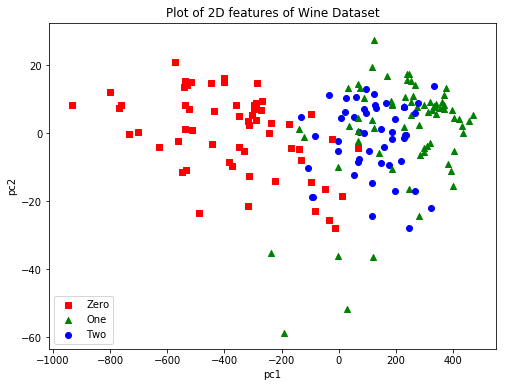

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (labels[i]==0):
        zerop = ax.scatter(x[i], y[i], c='r', marker='s')
    if (labels[i]==1):
        onep = ax.scatter(x[i], y[i], c='g', marker='^')
    if (labels[i]==2):
        twop = ax.scatter(x[i], y[i], c='b', marker='o')
ax.set_title("Plot of 2D features of Wine Dataset")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.legend([zerop,onep,twop], ["Zero","One","Two"],loc=3)

plt.show()

In [124]:
stddev= np.array([[np.std(attr)] for attr in S])
X = S/stddev
checkvar = np.var(X)
print ("Variance of Standardized Data is ",checkvar)

Variance of Standardized Data is  1.0


In [126]:
U_n,s,VT = la.svd(X)
#print(U.shape)
U2d_n = U_n[:,:2]
features_n = np.matmul(U2d_n.transpose(),X)
print("Features shape",features_n.shape)

Features shape (2, 178)


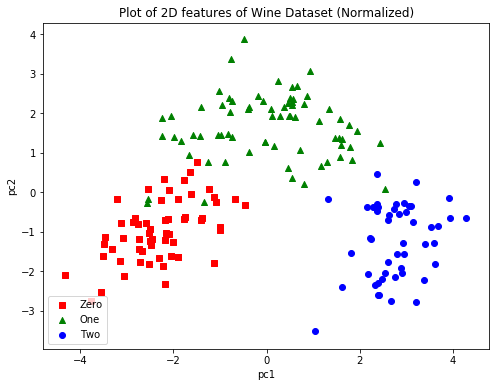

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features_n.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (labels[i]==0):
        zerop = ax.scatter(x[i], y[i], c='r', marker='s')
    if (labels[i]==1):
        onep = ax.scatter(x[i], y[i], c='g', marker='^')
    if (labels[i]==2):
        twop = ax.scatter(x[i], y[i], c='b', marker='o')
ax.set_title("Plot of 2D features of Wine Dataset (Normalized)")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.legend([zerop,onep,twop], ["Zero","One","Two"],loc=3)

plt.show()

By inspection we can say that the centered and normalized dataset provides better PCA features for classification. The reason is that the 3 classes are much more separated in the normalized plot in comparison to the previous plot. If we decide to use SVM, finding a boundary will be much easier with normalized data.

## Naive Bayes Classification

In [128]:
import math
def probGaussian(x,mean,stddev):
    return (1/math.sqrt(2*math.pi*stddev**2))*math.exp(-(x-mean)**2/(2*(stddev**2)))
    
def NBC(data,labels,testdata):
    # assuming data is preprocessed (e.g. centered, normalized) and mxn
    U_n,s,VT = la.svd(data)
    #print(U.shape)
    U2d_n = U_n[:,:2]
    features_n = np.matmul(U2d_n.transpose(),data)
    LabelData = [{'class':x, 'index':i} for i,x in enumerate(labels)] 
    #print(LabelData)
    ZeroData = list(filter(lambda x: x['class']==0, LabelData))
    OneData = list(filter(lambda x: x['class']==1, LabelData))
    TwoData = list(filter(lambda x: x['class']==2, LabelData))
    #print (ZeroData)
    PZero = len(ZeroData)/len(LabelData)
    POne = len(OneData)/len(LabelData)
    PTwo = len(TwoData)/len(LabelData)
    #print(PZero,POne,PTwo)
    #M = stddata.shape[0]
    class0x = []
    class0y = []
    class1x = []
    class1y = []
    class2x = []
    class2y = []
    for i in range(len(ZeroData)):
        idx = ZeroData[i]['index']
        class0x.append(features_n[0][idx])
        class0y.append(features_n[1][idx])
    for i in range(len(OneData)):
        idx = OneData[i]['index']
        class1x.append(features_n[0][idx])
        class1y.append(features_n[1][idx])
    for i in range(len(TwoData)):
        idx = TwoData[i]['index']
        class2x.append(features_n[0][idx])
        class2y.append(features_n[1][idx])
        
    mean0x = np.mean(class0x); std0x = np.std(class0x)
    mean0y = np.mean(class0y); std0y = np.std(class0y)
    mean1x = np.mean(class1x); std1x = np.std(class1x)
    mean1y = np.mean(class1y); std1y = np.std(class1y)
    mean2x = np.mean(class2x); std2x = np.std(class2x)
    mean2y = np.mean(class2y); std2y = np.std(class2y)
        
    U,s,VT = la.svd(testdata)
    #print(U.shape)
    U2d = U[:,:2]
    features = np.matmul(U2d.transpose(),testdata)
    
    predictions = []
    for i in range(features.shape[1]):
        p0 = probGaussian(features[0][i],mean0x,std0x)*probGaussian(features[1][i],mean0y,std0y)
        p1 = probGaussian(features[0][i],mean1x,std1x)*probGaussian(features[1][i],mean1y,std1y)
        p2 = probGaussian(features[0][i],mean2x,std2x)*probGaussian(features[1][i],mean2y,std2y)
        p = [p0,p1,p2]
        predictions.append(p.index(max(p)))
    return predictions
    

### Case I - only centered data

In [129]:
test1 = S[:,0:36]; train1 = S[:,36:178]
test_labels1 = labels[0:36]; train_labels1 = labels[36:178]

test2 = S[:,36:72]; train2 = np.column_stack((S[:,0:36],S[:,72:]))
test_labels2 = labels[36:72]; train_labels2 = np.append(labels[:36],labels[72:])

test3 = S[:,72:108]; train3 = np.column_stack((S[:,0:72],S[:,108:]))
test_labels3 = labels[72:108]; train_labels3 = np.append(labels[:72],labels[108:])

test4 = S[:,108:143]; train4 = np.column_stack((S[:,0:108],S[:,143:]))
test_labels4 = labels[108:143]; train_labels4 = np.append(labels[:108],labels[143:])

test5 = S[:,143:]; train5 = S[:,0:143]
test_labels5 = labels[143:]; train_labels5 = labels[:143]


In [130]:
pred1 = NBC(train1,train_labels1,test1)
pred2 = NBC(train2,train_labels2,test2)
pred3 = NBC(train3,train_labels3,test3)
pred4 = NBC(train4,train_labels4,test4)
pred5 = NBC(train5,train_labels5,test5)

def counterror(pred,labels):
    count = 0;
    for i in range(len(pred)):
        if (pred[i] != labels[i]):
            count = count +1
    return count

errors = []
errors.append(counterror(pred1,test_labels1))
errors.append(counterror(pred2,test_labels2))
errors.append(counterror(pred3,test_labels3))
errors.append(counterror(pred4,test_labels4))
errors.append(counterror(pred5,test_labels5))
#predicted = np.hstack((pred1,pred2,pred3,pred4,pred5))

#print(predicted)
print("Errors: ",errors)
print("Mean: ", np.mean(errors))
print("Variance: ",np.var(errors))

Errors:  [11, 9, 10, 6, 9]
Mean:  9.0
Variance:  2.8


### Case II - standardized data

In [131]:
test1 = X[:,0:36]; train1 = X[:,36:178]
test_labels1 = labels[0:36]; train_labels1 = labels[36:178]

test2 = X[:,36:72]; train2 = np.column_stack((X[:,0:36],X[:,72:]))
test_labels2 = labels[36:72]; train_labels2 = np.append(labels[:36],labels[72:])

test3 = X[:,72:108]; train3 = np.column_stack((X[:,0:72],X[:,108:]))
test_labels3 = labels[72:108]; train_labels3 = np.append(labels[:72],labels[108:])

test4 = X[:,108:143]; train4 = np.column_stack((X[:,0:108],X[:,143:]))
test_labels4 = labels[108:143]; train_labels4 = np.append(labels[:108],labels[143:])

test5 = X[:,143:]; train5 = X[:,0:143]
test_labels5 = labels[143:]; train_labels5 = labels[:143]

In [132]:
pred1 = NBC(train1,train_labels1,test1)
pred2 = NBC(train2,train_labels2,test2)
pred3 = NBC(train3,train_labels3,test3)
pred4 = NBC(train4,train_labels4,test4)
pred5 = NBC(train5,train_labels5,test5)

errors = []
errors.append(counterror(pred1,test_labels1))
errors.append(counterror(pred2,test_labels2))
errors.append(counterror(pred3,test_labels3))
errors.append(counterror(pred4,test_labels4))
errors.append(counterror(pred5,test_labels5))
#predicted = np.hstack((pred1,pred2,pred3,pred4,pred5))

#print(predicted)
print("Errors: ",errors)
print("Mean: ", np.mean(errors))
print("Variance: ",np.var(errors))

Errors:  [5, 4, 3, 21, 35]
Mean:  13.6
Variance:  158.23999999999998
